### run tflite model

In [1]:
import numpy as np
import tflite_runtime.interpreter as tflite

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/iris_landmark.tflite')
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

In [5]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data  = interpreter.get_tensor(output_details[0]['index'])
output_score  = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[ 2.4772800e+01  3.2634815e+01  3.0591121e+00  2.6509365e+01
   3.3795406e+01  2.0377262e+00  2.8289812e+01  3.4344658e+01
   1.1259704e+00  3.0564209e+01  3.4939148e+01  1.7352244e-01
   3.4007774e+01  3.5211723e+01 -5.4298389e-01  3.7131142e+01
   3.5041729e+01 -5.1357388e-01  3.9906120e+01  3.4397423e+01
   6.9254294e-02  4.1777882e+01  3.3883343e+01  9.3107116e-01
   4.2555477e+01  3.3323540e+01  1.0172620e+00  2.5938850e+01
   3.1780590e+01  1.9235708e+00  2.7292944e+01  3.0728157e+01
   9.4438386e-01  2.9571121e+01  2.9539345e+01  1.9962814e-01
   3.3215664e+01  2.8915670e+01 -2.6353872e-01  3.6606815e+01
   2.9426142e+01 -3.1586322e-01  3.9764339e+01  3.0839828e+01
   1.7279708e-01  4.1744858e+01  3.2431900e+01  6.7067647e-01
   2.3264044e+01  3.2929825e+01  3.4130440e+00  2.4708122e+01
   3.5364613e+01  2.1688499e+00  2.6688223e+01  3.6618134e+01
   8.6227125e-01  3.0052900e+01  3.7324081e+01 -4.2104229e-01
   3.3742840e+01  3.7331669e+01 -1.1370069e+00  3.7302036e+01
   3.687

In [6]:
%%timeit
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

15.3 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
import torch

In [8]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.4.0
CUDA version: 10.0
cuDNN version: 7603


In [9]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
from blazeiris import Blazeiris

net = Blazeiris().to(device)
net.load_weights("blazeiris.pth")

In [10]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)

In [11]:
with torch.no_grad():
    out = net(input_t)

In [12]:
print(output_data, output_score)
print(input_data.shape)

[[ 2.4772800e+01  3.2634815e+01  3.0591121e+00  2.6509365e+01
   3.3795406e+01  2.0377262e+00  2.8289812e+01  3.4344658e+01
   1.1259704e+00  3.0564209e+01  3.4939148e+01  1.7352244e-01
   3.4007774e+01  3.5211723e+01 -5.4298389e-01  3.7131142e+01
   3.5041729e+01 -5.1357388e-01  3.9906120e+01  3.4397423e+01
   6.9254294e-02  4.1777882e+01  3.3883343e+01  9.3107116e-01
   4.2555477e+01  3.3323540e+01  1.0172620e+00  2.5938850e+01
   3.1780590e+01  1.9235708e+00  2.7292944e+01  3.0728157e+01
   9.4438386e-01  2.9571121e+01  2.9539345e+01  1.9962814e-01
   3.3215664e+01  2.8915670e+01 -2.6353872e-01  3.6606815e+01
   2.9426142e+01 -3.1586322e-01  3.9764339e+01  3.0839828e+01
   1.7279708e-01  4.1744858e+01  3.2431900e+01  6.7067647e-01
   2.3264044e+01  3.2929825e+01  3.4130440e+00  2.4708122e+01
   3.5364613e+01  2.1688499e+00  2.6688223e+01  3.6618134e+01
   8.6227125e-01  3.0052900e+01  3.7324081e+01 -4.2104229e-01
   3.3742840e+01  3.7331669e+01 -1.1370069e+00  3.7302036e+01
   3.687

In [13]:
out

[tensor([[26.1087, 36.4227,  2.4027, 28.4528, 37.6359,  1.4535, 30.9113, 38.1751,
           0.6211, 33.8239, 38.6448, -0.1809, 37.8309, 38.4395, -0.6006, 41.2979,
          37.8271, -0.1313, 44.1604, 36.9379,  0.8731, 45.9743, 36.3385,  1.9711,
          46.7454, 35.7726,  2.2684, 27.4005, 35.3001,  1.2196, 28.9052, 34.0895,
           0.2228, 31.4572, 32.5984, -0.4671, 35.5734, 31.6215, -0.6290, 39.3722,
          31.9294, -0.2797, 43.0042, 33.2386,  0.7206, 45.6233, 34.8809,  1.5849,
          24.2086, 36.7098,  2.7424, 26.4296, 39.2925,  1.5680, 29.4897, 40.6731,
           0.3389, 33.8289, 41.2751, -0.7485, 38.2736, 40.7828, -1.1333, 42.3695,
          39.8489, -0.7952, 45.4435, 38.5626,  0.5026, 47.3979, 37.1564,  1.3492,
          48.3165, 35.4816,  2.1459, 23.7409, 34.1745,  0.9754, 25.4688, 31.6668,
          -0.5503, 28.4322, 29.2819, -1.4803, 33.2907, 27.6995, -1.8053, 38.5190,
          27.9187, -1.0301, 42.8602, 29.6453,  0.4093, 46.9754, 32.8198,  1.5281,
          21.807

In [26]:
import cv2
img = cv2.imread("eyesample2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ori = cv2.resize(img, (64,64))

In [27]:
img_ori = img_ori[np.newaxis, ...]
input_data = img_ori.astype('float32')
input_data = input_data / 127.5 - 1.0
input_data.shape

(1, 64, 64, 3)

In [28]:
input_data.min()

-0.96862745

In [29]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/iris_landmark.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_score = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[ 20.199902    36.47366      5.242034    22.561987    38.73013
    3.6028562   25.132092    40.149277     2.2678447   28.715712
   41.090824     0.6922799   33.69872     41.16095     -0.36431423
   38.48287     40.33644     -0.3428996   43.047825    39.184006
    0.5900787   46.11066     38.70252      1.6962507   47.45645
   38.201767     1.7142663   21.412014    35.236538     2.6694076
   23.034483    33.794716     0.6145719   25.958042    31.94916
   -1.2692604   30.855669    30.696815    -2.5492582   35.99106
   30.924528    -2.4692311   41.364822    33.062138    -1.2275732
   45.52043     36.180912     0.43962747  17.972286    36.34012
    6.3076425   20.887411    40.513275     4.75683     23.93947
   43.16878      2.7714238   28.854635    44.242043     0.6711279
   34.18095     44.295475    -0.54226583  39.74244     43.43052
   -0.6440459   44.445457    41.803673     0.31874764  47.596535
   40.27668      0.9315882   49.421833    38.306183     1.2309594
   17.321266    31.722366 

In [30]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)
with torch.no_grad():
    out = net(input_t)

In [31]:
print(out)

[tensor([[ 2.0820e+01,  3.7244e+01,  5.6755e+00,  2.3140e+01,  3.9564e+01,
          3.9632e+00,  2.5701e+01,  4.1089e+01,  2.5573e+00,  2.9314e+01,
          4.2182e+01,  8.6688e-01,  3.4365e+01,  4.2456e+01, -3.6106e-01,
          3.9355e+01,  4.1711e+01, -5.1290e-01,  4.4206e+01,  4.0503e+01,
          2.9901e-01,  4.7415e+01,  3.9909e+01,  1.3267e+00,  4.8786e+01,
          3.9301e+01,  1.3173e+00,  2.2026e+01,  3.5974e+01,  2.9999e+00,
          2.3644e+01,  3.4493e+01,  8.6171e-01,  2.6593e+01,  3.2581e+01,
         -1.1405e+00,  3.1629e+01,  3.1330e+01, -2.5834e+00,  3.6950e+01,
          3.1610e+01, -2.6439e+00,  4.2477e+01,  3.3843e+01, -1.5336e+00,
          4.6791e+01,  3.7177e+01,  7.4277e-02,  1.8637e+01,  3.7164e+01,
          6.8330e+00,  2.1420e+01,  4.1338e+01,  5.2322e+00,  2.4396e+01,
          4.4096e+01,  3.1305e+00,  2.9262e+01,  4.5350e+01,  8.8611e-01,
          3.4702e+01,  4.5582e+01, -5.1243e-01,  4.0463e+01,  4.4798e+01,
         -8.3196e-01,  4.5426e+01,  4

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

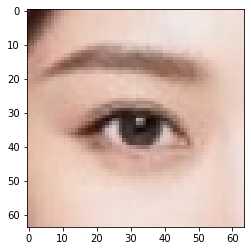

In [33]:
plt.imshow(img_ori.squeeze())

In [34]:
hand_kpts = output_data.reshape(-1, 3)
iris = output_score.reshape(-1,3)

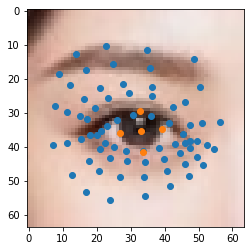

In [35]:
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(hand_kpts[:, 0], hand_kpts[:, 1])
ax.scatter(iris[:, 0], iris[:, 1])

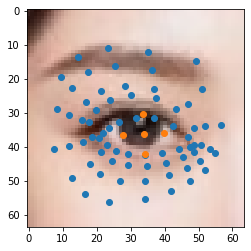

In [36]:
detections1, detections2 = out
detections1 = detections1.reshape(-1,3)
detections2 = detections2.reshape(-1,3)
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(detections1[:, 0], detections1[:, 1])
ax.scatter(detections2[:, 0], detections2[:, 1])